In [1]:
%matplotlib inline

# Pengenalan citra digital berbasis graph menggunakan metode graph matching

## 1. Segmentasi Felzenzswalb
## 2. Ekstraksi Fitur Region Adjacency Graph Mean Colors
## 3.  Graph matching
### - Exact Matching : VF2 Algorithm
### - Inexact Matching : Graph Edit Distance

## Memasukan gambar
program di bawah akan melakukan input gambar menggunakan modul skimage dan melakukan imshow menggunakan modul matplotlib

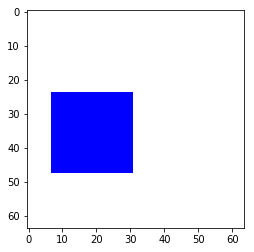

In [5]:
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np


img = io.imread('img\img003.jpg')
# print(img) # print nilai image original
plt.imshow(img)
plt.show()


## Segmentasi citra menjadi region-region

Segmentasi ini dilakukan menggunakan metode Felzenszwalb. diambil dari library skimage

Felzenszwalb number of segments: 2


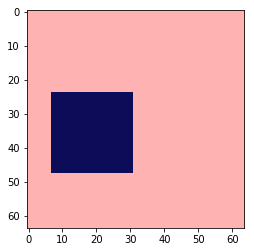

In [6]:
from skimage import segmentation, color

# operasi segmentasi felzenszwalb
labels = segmentation.felzenszwalb(img, min_size=350)
# print(labels) # print nilai-nilai region hasil segmentasi

# mewarnai labels, bisa 'overlay'=acak atau 'average'=mengikuti gambar
out1 = color.label2rgb(labels, img, kind='overlay')

# print shape dari labels
# print(labels.shape)

# menemukan nilai unik dari matriks sehingga didapat jumlah region
print("Felzenszwalb number of segments: {}".format(len(np.unique(labels))))

# normalisasi nilai gambar
# un = len(np.unique(labels))-1
# im = labels/un*255

# mengubah array menjadi Image
# im = Image.fromarray(im)
# print(im)

# untuk ngecek value dari matriks
# np.savetxt('dimage.txt', labels.astype(int))

# show image melalui matplotlib
plt.imshow(out1)
plt.show()

## Pembuatan Region Adjacency Graph

Langkah ini membangun RAG dari label image yang telah tersegmentasi

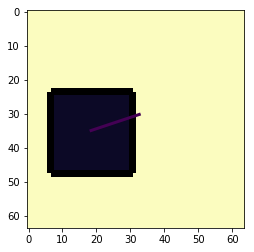


Nodes yang terbentuk, centroidnya, dan mean color :

[(0, {'total color': array([ 897600.,  897600.,  897600.]), 'centroid': (30, 33), 'labels': [0], 'mean color': array([ 255.,  255.,  255.]), 'pixel count': 3520}), (1, {'total color': array([  2.40000000e+01,   0.00000000e+00,   1.46304000e+05]), 'centroid': (35, 18), 'labels': [1], 'mean color': array([  4.16666667e-02,   0.00000000e+00,   2.54000000e+02]), 'pixel count': 576})]
[(0, {'total color': array([ 897600.,  897600.,  897600.]), 'centroid': (30, 33), 'labels': [0], 'mean color': array([ 255.,  255.,  255.]), 'pixel count': 3520}), (1, {'total color': array([  2.40000000e+01,   0.00000000e+00,   1.46304000e+05]), 'centroid': (35, 18), 'labels': [1], 'mean color': array([  4.16666667e-02,   0.00000000e+00,   2.54000000e+02]), 'pixel count': 576})]

Edges yang terbentuk:

[(0, 1)]

weight dari edges :

edge[0][1] = 360
<class 'skimage.future.graph.rag.RAG'>


In [7]:
from skimage.future import graph

# menghitung rag dari melalui variabel citra original dan labels
g =  graph.rag_mean_color(img, labels, connectivity=1, mode='distance')

# mendapatkan nilai <matplotlib> dari graph 'rag' untuk kemudian ditampilkan
gshow = graph.show_rag(labels,g,img,edge_cmap='viridis',img_cmap='magma',edge_width=3)

# memberikan colorbar citra
# cbar = plt.colorbar(gshow)

plt.show()

print('\nNodes yang terbentuk, centroidnya, dan mean color :\n')
print(g.nodes('centroid'))
print(g.nodes('mean color'))

print('\nEdges yang terbentuk:\n')
print(g.edges())

# nilai weight diambil dari eucledian distance |c1 - c2| = sqrt(sum((c1meancolor - c2meancolor)^2))
print '\nweight dari edges :\n'
for a, x in g.edges():
    w = int(g[a][x]['weight'])
    print ("edge[%d][%d] = %d" % (a,x,w))
    
print(type(g))

## Percobaan input 2 citra

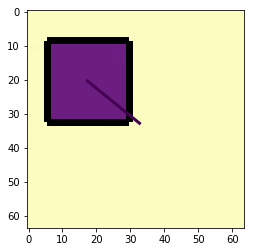

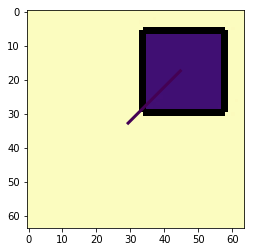

Segmen dari gambar 1 adalah : 2
Segmen dari gambar 2 adalah : 2
[0, 1]
[(0, 1)]


In [52]:
img1 = io.imread('img\img001.jpg')
img2 = io.imread('img\img011.jpg')

label1 = segmentation.felzenszwalb(img1, scale=3.0, min_size=350)
label2 = segmentation.felzenszwalb(img2, scale=3.0, min_size=350)

g1 =  graph.rag_mean_color(img1, label1, mode='distance')
g2 =  graph.rag_mean_color(img2, label2, mode='distance')

gshow1 = graph.show_rag(label1,g1,img1,edge_cmap='viridis',img_cmap='magma',edge_width=3)
gshow2 = graph.show_rag(label2,g2,img2,edge_cmap='viridis',img_cmap='magma',edge_width=3)

plt.show()
print("Segmen dari gambar 1 adalah : {}".format(len(np.unique(label1))))
print("Segmen dari gambar 2 adalah : {}".format(len(np.unique(label2))))

print(g1.nodes())
print(g1.edges())

### Menyimpan nilai-nilai graph dalam variabel

In [53]:
# fungsi untuk memasukkan nilai graph ke dalam satu variabel

def graphVar(g1):

    _node = g1.nodes()
    
    mean_color = []
    for node in g1.nodes('mean color'):
        mean_color += [node[1]]

    edge = []
    n = 0
    for a, b in g1.edges():
        w = int(g1[a][b]['weight'])
        edge += [{
            'edge': n,
            'first_node':a,
            'last_node':b,
            'weight':w
        }]
        n += 1


    graph1={'nodes':_node,'mean_color':mean_color, 'edge':edge}
    
    return graph1

#### --------main----------
Memasukkan nilai dictionary masing-masing graph ke dalam sebuah variabel,
melalui pemanggilan fungsi graphVar()

In [54]:
import pprint

# masukan nilai g1 dan g2 ke dalam variable baru
graph1 = graphVar(g1)
graph2 = graphVar(g2)

# print dictionary dengan prety print

pp = pprint.PrettyPrinter(indent=4)

print('Graph 1 :\n')
pp.pprint(graph1)
print('\nGraph 2 :\n')
pp.pprint(graph2)

Graph 1 :

{   'edge': [{   'edge': 0, 'first_node': 0, 'last_node': 1, 'weight': 260}],
    'mean_color': [   {   'centroid': (33, 33),
                          'labels': [0],
                          'mean color': array([ 254.96818182,  254.98238636,  254.95909091]),
                          'pixel count': 3520,
                          'total color': array([ 897488.,  897538.,  897456.])},
                      {   'centroid': (20, 17),
                          'labels': [1],
                          'mean color': array([  75.41840278,   66.49131944,  252.23784722]),
                          'pixel count': 576,
                          'total color': array([  43441.,   38299.,  145289.])}],
    'nodes': [0, 1]}

Graph 2 :

{   'edge': [{   'edge': 0, 'first_node': 0, 'last_node': 1, 'weight': 360}],
    'mean_color': [   {   'centroid': (33, 29),
                          'labels': [0],
                          'mean color': array([ 254.97471591,  254.98607955,  254.9727272

## Exact Graph Matching menggunakan Algoritma VF2
Algoritma ini akan melakukan pencocokan setiap node pada graph melalui sifat isomorphism. Algoritma ini bekerja tanpa memperhatikan nilai atribut pada masing-masing node dan edge

In [55]:
from networkx.algorithms import isomorphism

gm = isomorphism.GraphMatcher(g1,g2)
print(gm.is_isomorphic())
print(gm.mapping)

True
{0: 0, 1: 1}


## Save dan Open graph dengan gpickle
Menyimpan sebuah graph dalam bentuk file

In [56]:
import networkx as nx

nx.write_gpickle(g1, 'graph\img001.gpickle')
gx = nx.read_gpickle('graph\img001.gpickle')
print(gx.nodes())
print(gx.edges())

[0, 1]
[(0, 1)]


## Inexact Graph Matching menggunakan Graph Edit Distance

In [64]:
def setWeight(g):
    for n in g.nodes():
        g.node[n]['weight'] = np.round(np.mean(g.node[n]['mean color']))
    

from ged4py.algorithm import graph_edit_dist

# c1 = g1
# c2 = g2
# setWeight(c1)
# setWeight(c2)

# print('\ngraph g\n')
# print(c1.nodes())
# print(c1.edges())
# for n in c1.nodes():
#     print(c1.node[n]['weight'])
# print('\n')
# print(c1.edges(data=True))
# print('\n')
# print(c2.nodes())
# print(c2.edges())
# for n in c2.nodes():
#     print(c2.node[n]['weight'])
# print('\n')
# print(c2.edges(data=True))

# print('\nEdit Distance')

g = nx.Graph()
g.add_edge('A','B')
g.add_node('C')
g.add_node('D')
g2=g.copy()
g.add_edge('A','C',weight=5)

print(graph_edit_dist.compare(g,g2))

0.5
